In [11]:
!wget https://raw.githubusercontent.com/armita15/computer-vision/main/images/daun_kemangi/026.jpeg --no-check-certificate


--2021-11-09 11:43:05--  https://raw.githubusercontent.com/armita15/computer-vision/main/images/daun_kemangi/026.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134753 (132K) [image/jpeg]
Saving to: ‘026.jpeg’

026.jpeg            100%[===================>] 131.59K  --.-KB/s    in 0.02s   

2021-11-09 11:43:05 (6.25 MB/s) - ‘026.jpeg’ saved [134753/134753]



In [32]:
from matplotlib import pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

In [7]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [12]:
args = {
	"image": "026.jpeg",
}

In [14]:
image = cv2.imread(args["image"])
(h, w, c) = image.shape[:3]

# display the image width, height, and number of channels to our
# terminal
print("width: {} pixels".format(image.shape[1]))
print("height: {}  pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

width: 1280 pixels
height: 1280  pixels
channels: 3


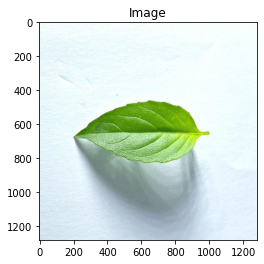

True

In [15]:
plt_imshow("Image", image)

# save the image back to disk (OpenCV handles converting image
# filetypes automatically)
cv2.imwrite("026_new.jpeg", image)

No. 2
Rotation


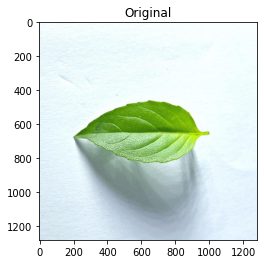

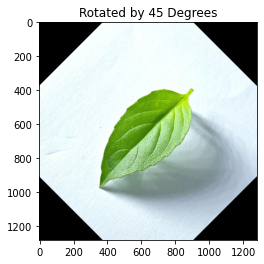

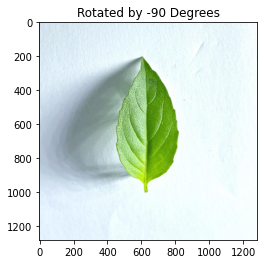

In [16]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# grab the dimensions of the image and calculate the center of the
# image
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by 45 Degrees", rotated)

# rotate our image by -90 degrees around the image
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by -90 Degrees", rotated)

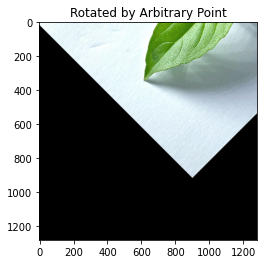

In [17]:

# rotate our image around an arbitrary point rather than the center
M = cv2.getRotationMatrix2D((10, 10), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by Arbitrary Point", rotated)

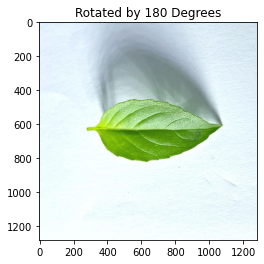

In [21]:
# use our imutils function to rotate an image 180 degrees
rotated = imutils.rotate(image, 180)
plt_imshow("Rotated by 180 Degrees", rotated)

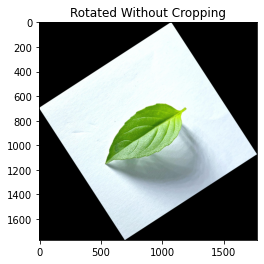

In [22]:
# rotate our image by 33 degrees counterclockwise, ensuring the
# entire rotated image still views in the viewing area
rotated = imutils.rotate_bound(image, -33)
plt_imshow("Rotated Without Cropping", rotated)

No. 3
Resize


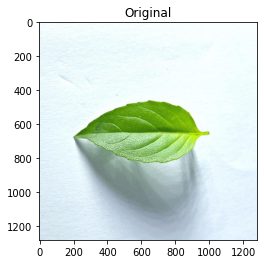

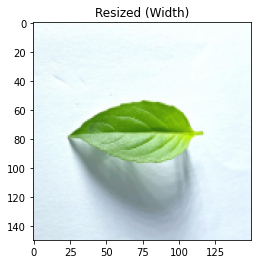

In [23]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# let's resize our image to be 150 pixels wide, but in order to
# prevent our resized image from being skewed/distorted, we must
# first calculate the ratio of the *new* width to the *old* width
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

# perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Width)", resized)

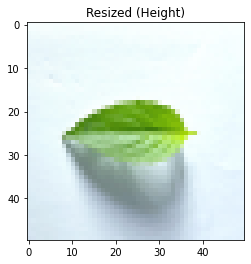

In [24]:
# let's resize the image to have a width of 50 pixels, again keeping
# in mind the aspect ratio
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

# perform the resizing
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Height)", resized)

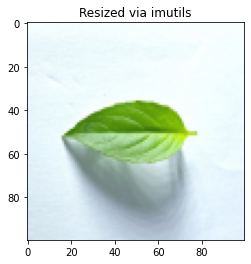

In [25]:

# calculating the ratio each and every time we want to resize an
# image is a real pain, so let's use the imutils convenience
# function which will *automatically* maintain our aspect ratio
# for us
resized = imutils.resize(image, width=100)
plt_imshow("Resized via imutils", resized)

[INFO] cv2.INTER_NEAREST


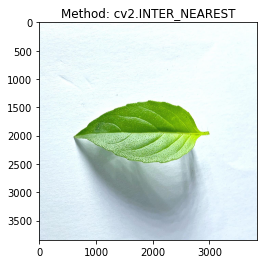

[INFO] cv2.INTER_LINEAR


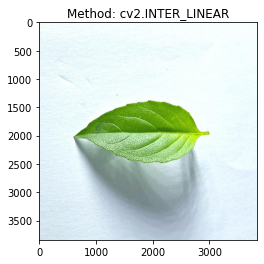

[INFO] cv2.INTER_AREA


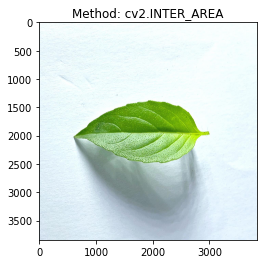

[INFO] cv2.INTER_CUBIC


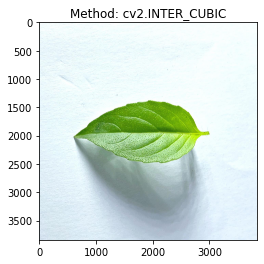

[INFO] cv2.INTER_LANCZOS4


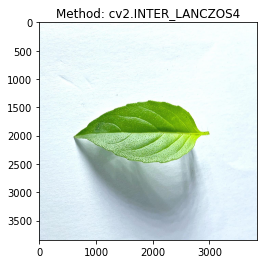

In [26]:
# construct the list of interpolation methods in OpenCV
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
	# increase the size of the image by 3x using the current
	# interpolation method
	print("[INFO] {}".format(name))
	resized = imutils.resize(image, width=image.shape[1] * 3,
		inter=method)
	plt_imshow("Method: {}".format(name), resized)

No. 4
Flipping

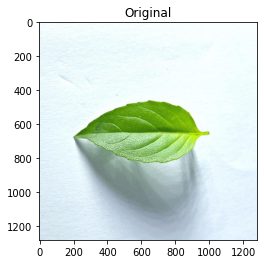

[INFO] flipping image horizontally...


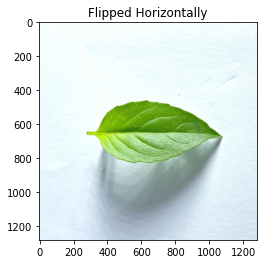

In [27]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# flip the image horizontally
print("[INFO] flipping image horizontally...")
flipped = cv2.flip(image, 1)
plt_imshow("Flipped Horizontally", flipped)

[INFO] flipping image vertically...


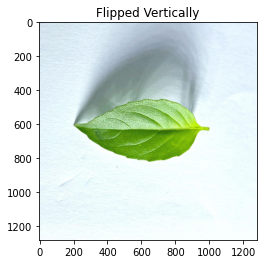

In [28]:

# flip the image vertically
flipped = cv2.flip(image, 0)
print("[INFO] flipping image vertically...")
plt_imshow("Flipped Vertically", flipped)

[INFO] flipping image horizontally and vertically...


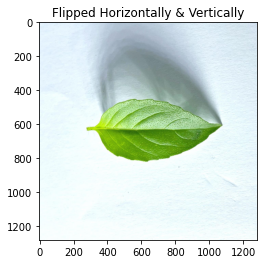

In [29]:
# flip the image along both axes
flipped = cv2.flip(image, -1)
print("[INFO] flipping image horizontally and vertically...")
plt_imshow("Flipped Horizontally & Vertically", flipped)

No. 5
Cropping


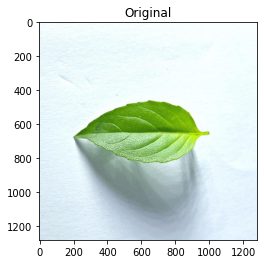

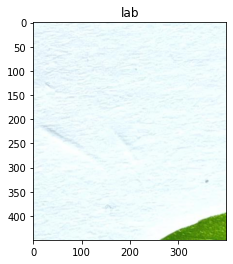

In [30]:
# load the input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# cropping an image with OpenCV is accomplished via simple NumPy
# array slices in startY:endY, startX:endX order -- here we are
# cropping the monitor from the image (these coordinates were
# determined using photo editing software such as Photoshop,
# GIMP, Paint, etc.)
# Dimension lab.jpeg = 720x1600
lab = image[100:550, 100:500]
plt_imshow("lab", lab)

No. 6
Masking


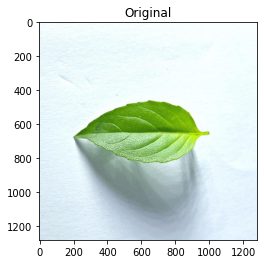

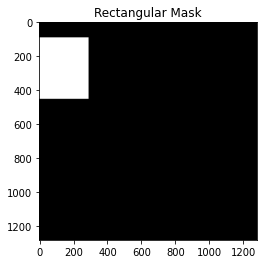

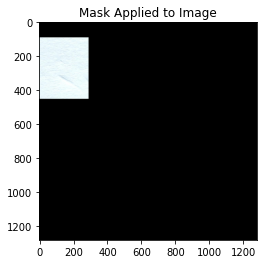

In [33]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
plt_imshow("Rectangular Mask", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)


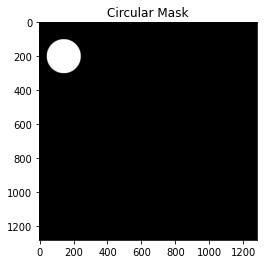

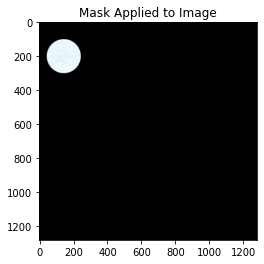

In [34]:

# now, let's make a circular mask with a radius of 100 pixels and
# apply the mask again
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

# show the output images
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)

No. 7
Splitting and merging channel


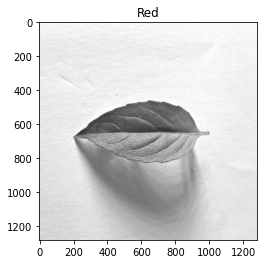

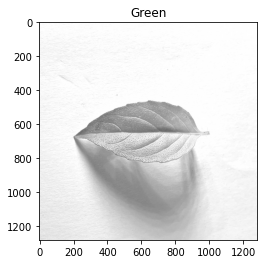

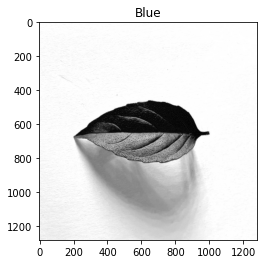

In [35]:
# load the input image and grab each channel -- note how OpenCV
# represents images as NumPy arrays with channels in Blue, Green,
# Red ordering rather than Red, Green Blue
image = cv2.imread(args["image"])
(B, G, R) = cv2.split(image)

# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

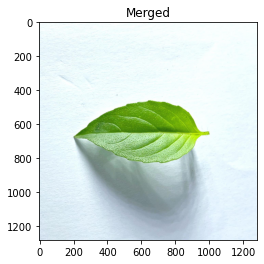

In [36]:
merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

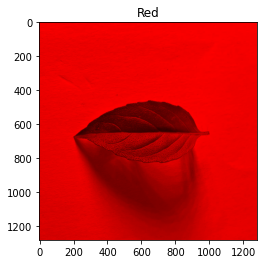

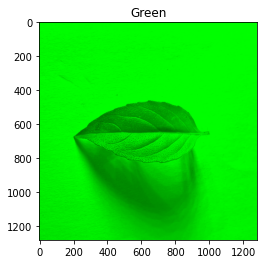

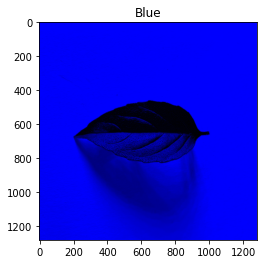

In [37]:
# visualize each channel in color
zeros = np.zeros(image.shape[:2], dtype="uint8")
plt_imshow("Red", cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))